# ***Data Prep***

In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.tools import diff
import statsmodels.api as sm 
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
!pip install statsmodels
import statsmodels.api as sm
!pip install pmdarima
import pmdarima
!pip install pyramid
import pyramid as pm
!pip install arch yfinance pmdarima
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
import io, os, sys, setuptools, tokenize
!pip install pystan~=2.14
!pip install fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('Onion.csv', index_col = 'Date', parse_dates=True)

In [5]:
df

,Price
Date,
2021-06-01,45.0
2021-06-02,55.0
2021-06-03,55.0
2021-06-04,55.0
2021-06-05,55.0
...,...
2022-11-26,45.0
2022-11-27,37.5
2022-11-28,40.0


In [6]:
df.dropna()

,Price
Date,
2021-06-01,45.0
2021-06-02,55.0
2021-06-03,55.0
2021-06-04,55.0
2021-06-05,55.0
...,...
2022-11-26,45.0
2022-11-27,37.5
2022-11-28,40.0


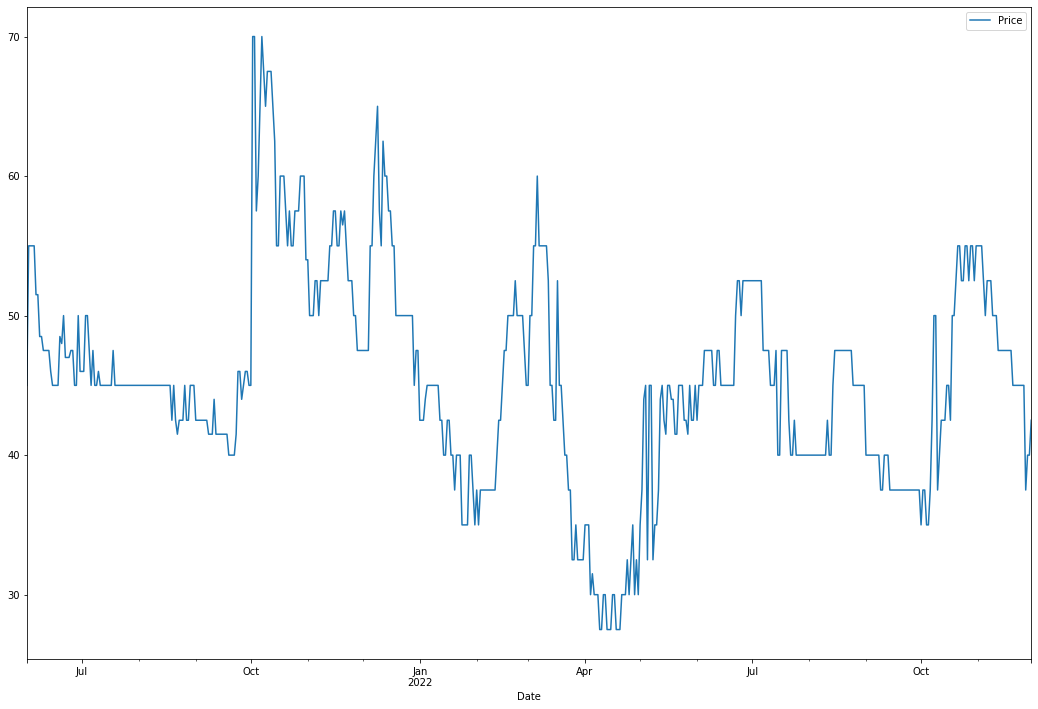

In [7]:
df.plot(figsize = (18, 12));

In [8]:
results = seasonal_decompose(df['Price'], model = 'addtive')

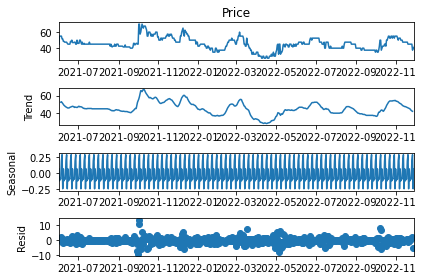

In [9]:
results.plot();

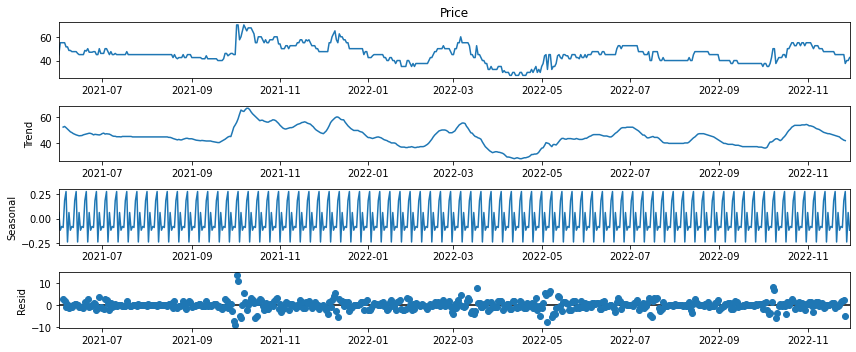

In [10]:
#from pylab import rcParams 
rcParams['figure.figsize'] = 12, 5 

results.plot();

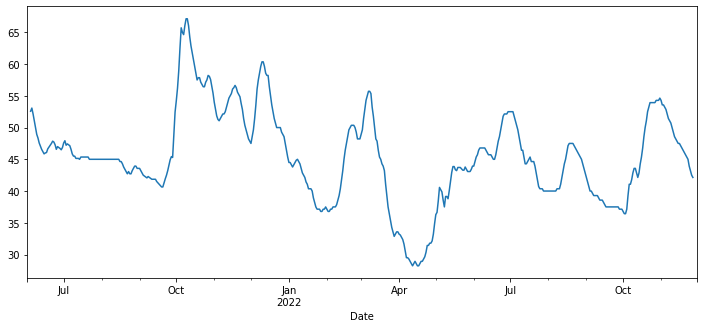

In [11]:
results.trend.plot()

In [12]:
df.index.freq = 'D'

In [13]:

df.head()

,Price
Date,
2021-06-01,45.0
2021-06-02,55.0
2021-06-03,55.0
2021-06-04,55.0
2021-06-05,55.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 548 entries, 2021-06-01 to 2022-11-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   548 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [15]:
train_data = df.iloc[:500]
test_data = df.iloc[499:]

# ***Exponential Smoothing***

In [16]:
fitted_model = ExponentialSmoothing(train_data['Price'], trend = 'add', seasonal = 'add', seasonal_periods=30).fit()

In [17]:
test_predictions = fitted_model.forecast(49)

In [18]:
test_predictions

2022-10-14    42.418401
2022-10-15    41.855833
2022-10-16    41.574431
2022-10-17    41.387056
2022-10-18    41.512090
2022-10-19    41.387184
2022-10-20    41.855931
2022-10-21    41.105611
2022-10-22    41.168350
2022-10-23    41.293311
2022-10-24    40.961204
2022-10-25    41.255234
2022-10-26    40.991155
2022-10-27    42.167357
2022-10-28    42.226511
2022-10-29    41.285156
2022-10-30    42.255944
2022-10-31    42.373779
2022-11-01    42.520978
2022-11-02    42.962020
2022-11-03    42.903059
2022-11-04    42.167736
2022-11-05    42.020612
2022-11-06    41.932277
2022-11-07    42.608979
2022-11-08    41.961670
2022-11-09    41.138378
2022-11-10    41.138207
2022-11-11    41.578982
2022-11-12    42.196174
2022-11-13    42.073658
2022-11-14    41.511090
2022-11-15    41.229687
2022-11-16    41.042313
2022-11-17    41.167347
2022-11-18    41.042441
2022-11-19    41.511187
2022-11-20    40.760868
2022-11-21    40.823607
2022-11-22    40.948567
2022-11-23    40.616460
2022-11-24    40

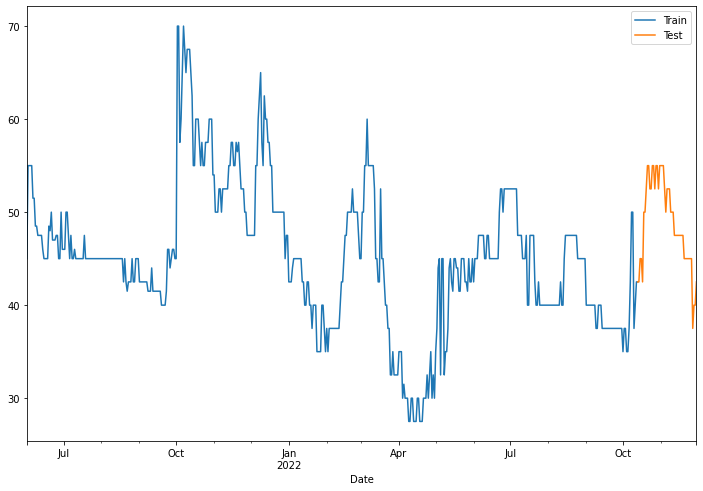

In [19]:
train_data['Price'].plot(legend=True, label='Train', figsize=(12,8))
test_data['Price'].plot(legend=True, label='Test', figsize=(12,8))

In [20]:
test_data.describe()

,Price
count,49.000000
mean,48.877551
std,4.788801
min,37.500000
25%,45.000000
50%,50.000000
75%,52.500000
max,55.000000


In [21]:
mean_absolute_error(test_data,test_predictions)


7.561475434809888

In [22]:
mean_squared_error(test_data, test_predictions)

74.02816428624462

In [23]:
from statsmodels.tools.eval_measures import rmse

In [24]:
rmse(test_data, test_predictions)

array([8.01156761, 8.4716655 , 8.7063289 , 8.86409098, 8.75868765,
       8.86398296, 8.47158486, 9.10316699, 9.04966151, 8.94345006,
       9.22676296, 8.97576296, 9.20107839, 8.21530859, 8.16706405,
       8.9503665 , 8.14311246, 8.04758621, 7.9290996 , 7.58011259,
       7.62621512, 8.21499951, 8.33559931, 8.40841407, 7.85872709,
       8.38415196, 9.07520792, 9.07535392, 8.7025115 , 8.19178812,
       8.29201796, 8.75952885, 8.99746717, 9.15726782, 9.05051628,
       9.15715844, 8.75944702, 9.39920991, 9.34508497, 9.23760685,
       9.52419128, 9.27031044, 9.4982239 , 8.49921954, 8.45018269,
       9.24460731, 8.42583165, 8.32867073, 8.20805954])

In [25]:
np.sqrt(mean_squared_error(test_data, test_predictions))

8.60396212719725

In [26]:
final_model = ExponentialSmoothing(df['Price'], trend = 'add', seasonal = 'add', seasonal_periods = 60).fit()

In [27]:
forecast_predictions = final_model.forecast(60)

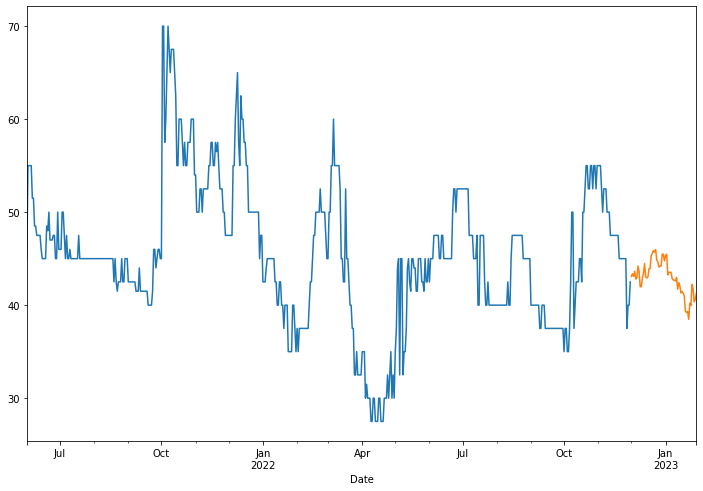

In [28]:
df['Price'].plot(figsize = (12,8))
forecast_predictions.plot(figsize=(12,8))

In [29]:
forecast_predictions

2022-12-01    43.091887
2022-12-02    43.369520
2022-12-03    43.091433
2022-12-04    43.646685
2022-12-05    42.813120
2022-12-06    42.924028
2022-12-07    44.201643
2022-12-08    43.645993
2022-12-09    41.979082
2022-12-10    41.978886
2022-12-11    42.923191
2022-12-12    43.423144
2022-12-13    44.478798
2022-12-14    43.034555
2022-12-15    42.923663
2022-12-16    43.034951
2022-12-17    43.924026
2022-12-18    43.924364
2022-12-19    45.313465
2022-12-20    45.591343
2022-12-21    45.869230
2022-12-22    45.702493
2022-12-23    45.980202
2022-12-24    44.869112
2022-12-25    44.646856
2022-12-26    44.091218
2022-12-27    44.202189
2022-12-28    44.202006
2022-12-29    45.479594
2022-12-30    45.479390
2022-12-31    44.757057
2023-01-01    45.312563
2023-01-02    45.479170
2023-01-03    43.256898
2023-01-04    43.534875
2023-01-05    43.534933
2023-01-06    43.534925
2023-01-07    42.868349
2023-01-08    42.701796
2023-01-09    42.701894
2023-01-10    42.590981
2023-01-11    42

# *SARIMAX*

In [30]:
from datetime import datetime

In [31]:
df_KN = pd.read_csv('Onion.csv', index_col = 'Date', parse_dates = True)

In [32]:
df_KN.index.freq ='D'

In [33]:
df_KN.index

DatetimeIndex(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10',
               ...
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24',
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=548, freq='D')

In [34]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [35]:
adf_test(df_KN['Price'])

ADF Statistics: -3.118424188466632
p- value: 0.025219421959448245
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [36]:
## Use Techniques Differencing
df_KN['Price First Difference']=df_KN['Price']-df_KN['Price'].shift(1)

In [37]:
df_KN.head()

,Price,Price First Difference
Date,,
2021-06-01,45.0,NaN
2021-06-02,55.0,10.0
2021-06-03,55.0,0.0
2021-06-04,55.0,0.0
2021-06-05,55.0,0.0


In [38]:
adf_test(df_KN['Price'].dropna())

ADF Statistics: -3.118424188466632
p- value: 0.025219421959448245
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [39]:
df_KN['Price Second Difference']=df_KN['Price First Difference']-df_KN['Price First Difference'].shift(1)

In [40]:
adf_test(df_KN['Price Second Difference'].dropna())

ADF Statistics: -10.219529141045468
p- value: 5.3702280275002654e-18
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [41]:
### 1 months
## Use Techniques Differencing
df_KN['Price Monthly Difference']=df_KN['Price']-df_KN['Price'].shift(30)

In [42]:
adf_test(df_KN['Price Monthly Difference'].dropna())

ADF Statistics: -4.94047119462275
p- value: 2.907097731457529e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


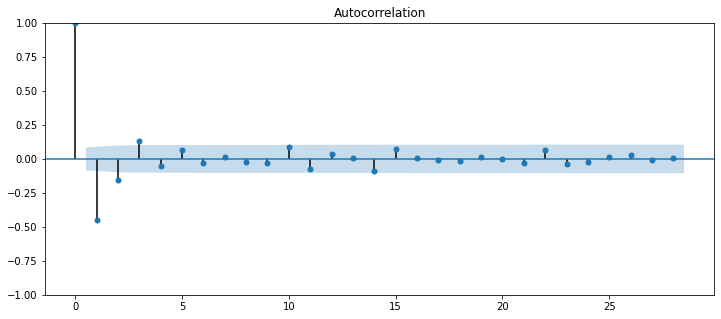

In [43]:
acf = plot_acf(df_KN['Price Second Difference'].dropna())

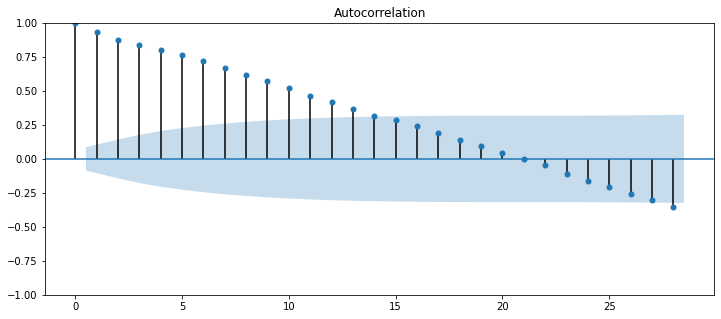

In [44]:
acf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

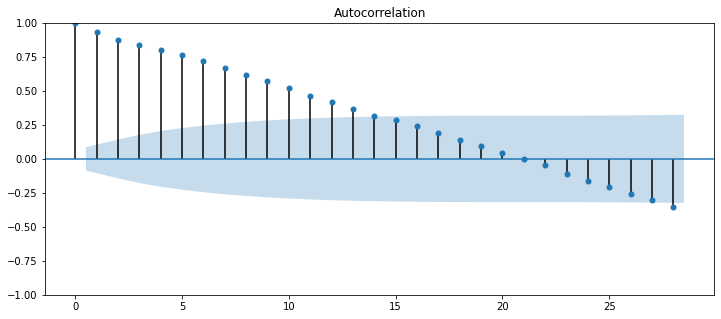

In [45]:
pacf_monthly = plot_acf(df_KN['Price Monthly Difference'].dropna())

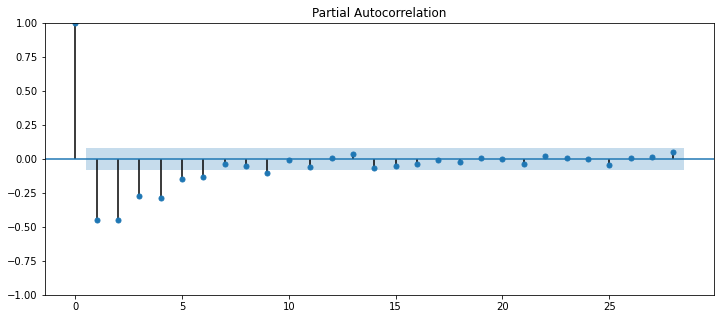

In [46]:
result_KN = plot_pacf(df_KN["Price Second Difference"].dropna())

In [47]:

from datetime import datetime,timedelta
train_dataset_end=datetime(2022,10,1)
test_dataset_end=datetime(2022,11,30)

In [48]:
train_data=df_KN[:train_dataset_end]
test_data=df_KN[train_dataset_end+timedelta(days=1):test_dataset_end]

In [49]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [50]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2022-10-02,37.5,2.5,5.0,-2.5
2022-10-03,37.5,0.0,-2.5,-2.5
2022-10-04,35.0,-2.5,-2.5,-5.0
2022-10-05,35.0,0.0,2.5,-5.0
2022-10-06,37.5,2.5,2.5,-2.5
2022-10-07,42.5,5.0,2.5,2.5
2022-10-08,50.0,7.5,2.5,10.0
2022-10-09,50.0,0.0,-7.5,12.5
2022-10-10,37.5,-12.5,-12.5,0.0


In [51]:
import statsmodels.api as sm

In [52]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from pmdarima import ARIMA

In [55]:
train_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference
Date,,,,
2021-06-01,45.0,NaN,NaN,NaN
2021-06-02,55.0,10.0,NaN,NaN
2021-06-03,55.0,0.0,-10.0,NaN
2021-06-04,55.0,0.0,0.0,NaN
2021-06-05,55.0,0.0,0.0,NaN
...,...,...,...,...
2022-09-27,37.5,0.0,0.0,-7.5
2022-09-28,37.5,0.0,0.0,-7.5
2022-09-29,37.5,0.0,0.0,-7.5


In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [57]:
model_SARIMAX=SARIMAX(train_data['Price'],order=(3,0,5),seasonal_order=(0,1,0,30))

In [58]:
model_SARIMAX_fit=model_SARIMAX.fit()

In [59]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                  488
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 30)   Log Likelihood               -1246.744
Date:                             Fri, 06 Jan 2023   AIC                           2511.488
Time:                                     23:30:06   BIC                           2548.629
Sample:                                 06-01-2021   HQIC                          2526.116
                                      - 10-01-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4234      0.516      2.760      0.006       0.413       2.434
ar.L2         -0.3074      0.950     -0.324      0.746      -2.170       1.555
ar.L3         -0.1476      0.471     -0.313      0.754      -1.072       0.776
ma.L1         -0.5483      0.521     -1.052      0.293      -1.570       0.473
ma.L2         -0.2906      0.535     -0.544      0.587      -1.338       0.757
ma.L3          0.1934      0.086      2.245      0.025       0.025       0.362
ma.L4         -0.0079      0.164     -0.048      0.962      -0.330       0.314
ma.L5          0.0954      0.073      1.313      0.189      -0.047       0.238
sigma2        13.4842      0.426     31.647      0.000      12.649      14.319
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1563.37
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.23
Prob(H) (two-sided):                  0.31   Kurtosis:                        12.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-10-02 00:00:00
2022-11-30 00:00:00


In [61]:
pred_Sarimax=model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))
residuals=test_data['Price']-pred_Sarimax

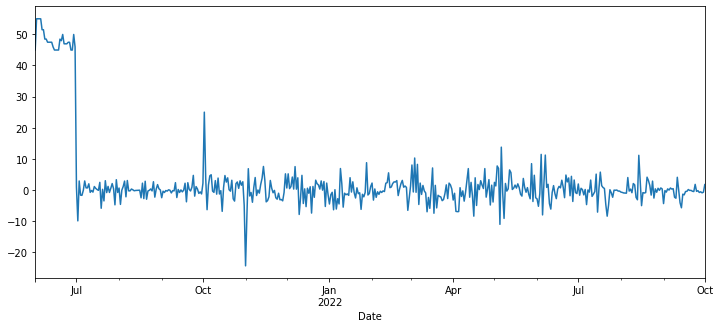

In [62]:
model_SARIMAX_fit.resid.plot()

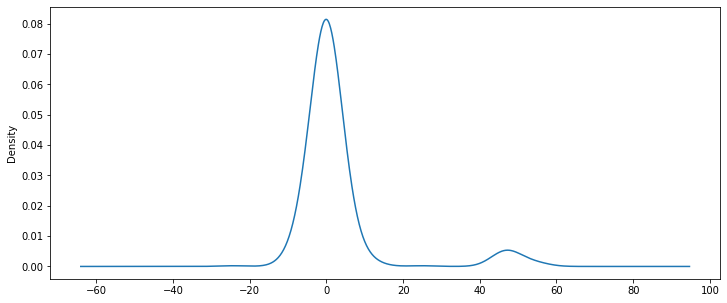

In [63]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [64]:
test_data['Predicted_SARIMAX']=pred_Sarimax

In [65]:
test_data

,Price,Price First Difference,Price Second Difference,Price Monthly Difference,Predicted_SARIMAX
Date,,,,,
2022-10-02,37.5,2.5,5.0,-2.5,35.306674
2022-10-03,37.5,0.0,-2.5,-2.5,35.272770
2022-10-04,35.0,-2.5,-2.5,-5.0,35.703643
2022-10-05,35.0,0.0,2.5,-5.0,35.948058
2022-10-06,37.5,2.5,2.5,-2.5,36.415794
2022-10-07,42.5,5.0,2.5,2.5,36.777901
2022-10-08,50.0,7.5,2.5,10.0,37.113460
2022-10-09,50.0,0.0,-7.5,12.5,34.910754
2022-10-10,37.5,-12.5,-12.5,0.0,35.177329


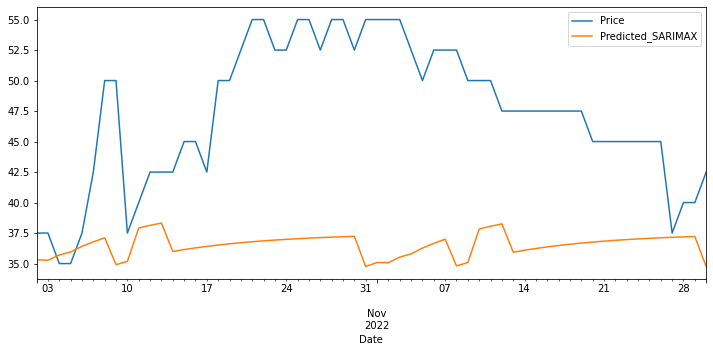

In [66]:
test_data[['Price','Predicted_SARIMAX']].plot()

In [67]:
pred_Sarimax

2022-10-02    35.306674
2022-10-03    35.272770
2022-10-04    35.703643
2022-10-05    35.948058
2022-10-06    36.415794
2022-10-07    36.777901
2022-10-08    37.113460
2022-10-09    34.910754
2022-10-10    35.177329
2022-10-11    37.915860
2022-10-12    38.129563
2022-10-13    38.321080
2022-10-14    35.992789
2022-10-15    36.146787
2022-10-16    36.284941
2022-10-17    36.408906
2022-10-18    36.520163
2022-10-19    36.620029
2022-10-20    36.709682
2022-10-21    36.790176
2022-10-22    36.862452
2022-10-23    36.927355
2022-10-24    36.985640
2022-10-25    37.037984
2022-10-26    37.084996
2022-10-27    37.127220
2022-10-28    37.165144
2022-10-29    37.199208
2022-10-30    37.229805
2022-10-31    34.757288
2022-11-01    35.088649
2022-11-02    35.076920
2022-11-03    35.527712
2022-11-04    35.790020
2022-11-05    36.273829
2022-11-06    36.650373
2022-11-07    36.998902
2022-11-08    34.807846
2022-11-09    35.084887
2022-11-10    37.832818
2022-11-11    38.054966
2022-11-12    38

In [68]:
predicted_value_SARIMA = pred_Sarimax

In [69]:
predicted_value_SARIMA = model_SARIMAX_fit.predict(start=datetime(2022,10,2),end=datetime(2022,11,30))

In [70]:
mean_absolute_error(test_data['Price'], test_data['Predicted_SARIMAX'])

10.861240895726583

In [71]:
mean_squared_error(test_data['Price'], test_data['Predicted_SARIMAX'])

151.26101752600314

In [72]:
rmse(test_data['Predicted_SARIMAX'], test_data['Price'])

12.298821794220906

# ***FB Prophet***

In [73]:
df_fb  = pd.read_csv('Onion.csv')

In [74]:
df_fb.columns = ['ds', 'y']

In [75]:
df_fb['ds'] =pd.to_datetime(df_fb['ds'])

In [76]:
df_fb.head()

,ds,y
0,2021-06-01,45.0
1,2021-06-02,55.0
2,2021-06-03,55.0
3,2021-06-04,55.0
4,2021-06-05,55.0


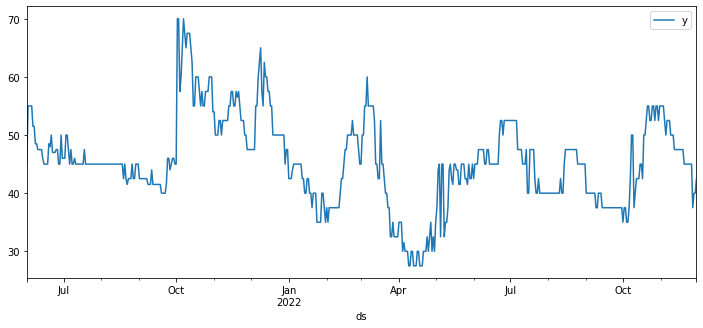

In [77]:
df_fb.plot(x='ds', y='y')

In [78]:
len(df_fb)

548

In [79]:
train_fb = df_fb.iloc[:488]
test_fb = df_fb.iloc[488:]

In [80]:
import prophet

In [81]:
import io, os, sys, setuptools, tokenize

In [82]:
from fbprophet import Prophet

In [83]:
m = Prophet()
m.fit(train_fb)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
543,2022-11-26,43.039847,34.931696,50.950930,42.342041,43.745261,0.017896,0.017896,0.017896,0.017896,0.017896,0.017896,0.0,0.0,0.0,43.057743
544,2022-11-27,43.048576,34.840738,51.728113,42.330913,43.781632,0.356838,0.356838,0.356838,0.356838,0.356838,0.356838,0.0,0.0,0.0,43.405414
545,2022-11-28,43.057305,34.551760,51.141216,42.327093,43.811075,-0.127027,-0.127027,-0.127027,-0.127027,-0.127027,-0.127027,0.0,0.0,0.0,42.930279
546,2022-11-29,43.066035,34.293335,51.659439,42.310748,43.834725,0.042243,0.042243,0.042243,0.042243,0.042243,0.042243,0.0,0.0,0.0,43.108278
547,2022-11-30,43.074764,34.948209,51.828865,42.301136,43.856387,-0.029570,-0.029570,-0.029570,-0.029570,-0.029570,-0.029570,0.0,0.0,0.0,43.045194


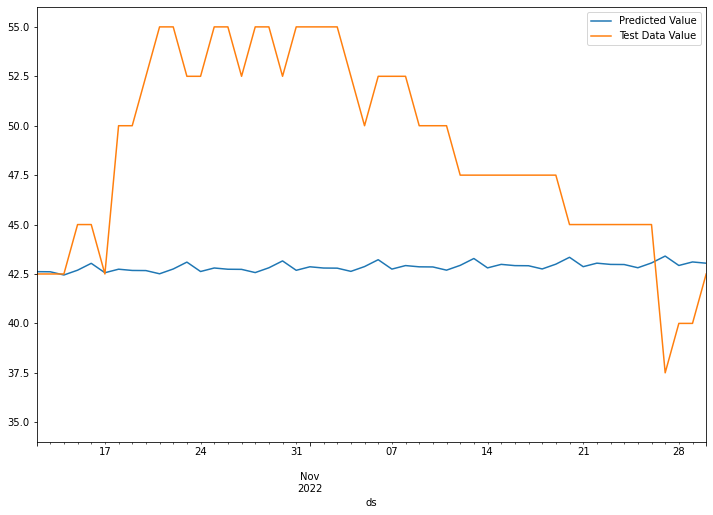

In [85]:
ax = forecast.plot(x='ds', y = 'yhat', label = 'Predicted Value', legend = True, figsize = (12, 8))
test_fb.plot(x='ds', y = 'y', label = 'Test Data Value', legend = True, ax = ax, xlim=('2022-10-12','2022-11-30'))

In [86]:
from statsmodels.tools.eval_measures import rmse

In [87]:
predictions_fb = forecast.iloc[-60:]['yhat']

In [88]:
predictions_fb

488    42.916579
489    42.441444
490    42.619443
491    42.556359
492    42.550069
493    42.387596
494    42.630012
495    42.977683
496    42.502548
497    42.680547
498    42.617463
499    42.611174
500    42.448700
501    42.691116
502    43.038787
503    42.563652
504    42.741652
505    42.678567
506    42.672278
507    42.509804
508    42.752221
509    43.099892
510    42.624757
511    42.802756
512    42.739672
513    42.733382
514    42.570909
515    42.813325
516    43.160996
517    42.685861
518    42.863860
519    42.800776
520    42.794487
521    42.632013
522    42.874429
523    43.222101
524    42.746966
525    42.924965
526    42.861881
527    42.855591
528    42.693118
529    42.935534
530    43.283205
531    42.808070
532    42.986069
533    42.922985
534    42.916695
535    42.754222
536    42.996638
537    43.344309
538    42.869174
539    43.047174
540    42.984089
541    42.977800
542    42.815326
543    43.057743
544    43.405414
545    42.930279
546    43.1082

In [89]:
test_fb

,ds,y
488,2022-10-02,37.5
489,2022-10-03,37.5
490,2022-10-04,35.0
491,2022-10-05,35.0
492,2022-10-06,37.5
493,2022-10-07,42.5
494,2022-10-08,50.0
495,2022-10-09,50.0
496,2022-10-10,37.5
497,2022-10-11,40.0


In [90]:
mean_absolute_error(test_fb['y'], predictions_fb)

6.213654240908777

In [91]:
mean_squared_error(test_fb['y'], predictions_fb)

53.98416056753699

In [92]:
rmse(predictions_fb, test_fb['y'])

7.347391412435912

In [93]:
test_fb.mean()

y    47.333333
dtype: float64

In [94]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [95]:
#Intial Training period 
initial = 400
initial = str(initial) +' days'
initial 
#Period Length for we are going to run cross validation for 
period = 400
period = str(period) +' days'

#Horizon of prediction for each fold 
horizon = 60
horizon = str(horizon) + ' days'

In [96]:
dfb_cv = cross_validation(m, initial = initial, period=period, horizon = horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-08-02 00:00:00 and 2022-08-02 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [97]:
dfb_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-08-03,46.806927,38.223525,55.068637,40.0,2022-08-02
1,2022-08-04,46.937093,38.435994,55.186723,40.0,2022-08-02
2,2022-08-05,46.891890,38.408974,54.878062,40.0,2022-08-02
3,2022-08-06,47.264503,38.842174,55.613543,40.0,2022-08-02
4,2022-08-07,47.469064,39.251166,55.482917,40.0,2022-08-02


In [98]:
performance_metrics(dfb_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,49.826401,7.058782,7.054927,0.176373,0.173715,1.000000
1,7 days,50.804461,7.127725,7.124629,0.178116,0.177315,1.000000
2,8 days,51.799081,7.197158,7.194223,0.179856,0.181120,1.000000
3,9 days,48.024135,6.929945,6.876379,0.170688,0.181120,1.000000
4,10 days,48.453293,6.960840,6.905565,0.171417,0.182247,1.000000
5,11 days,49.327305,7.023340,6.962760,0.172847,0.182247,0.833333
6,12 days,42.770341,6.539904,6.305544,0.155020,0.182247,0.833333
7,13 days,34.069917,5.836944,5.102658,0.124943,0.150578,0.833333
8,14 days,25.067163,5.006712,3.922360,0.095256,0.092165,0.833333
9,15 days,20.952738,4.577416,3.158621,0.077119,0.037756,0.833333


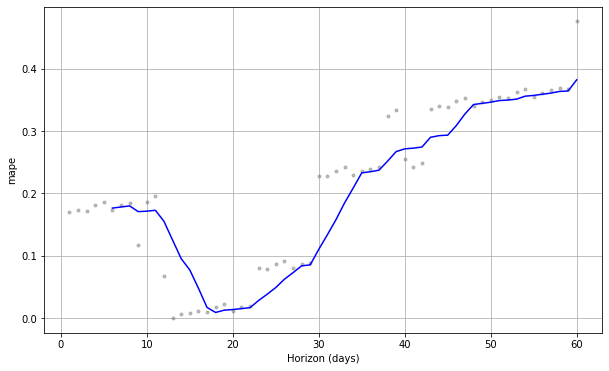

In [99]:
plot_cross_validation_metric(dfb_cv, metric = 'mape');

# **TREND FB**

In [100]:
df_t = pd.read_csv('Onion.csv')

In [101]:
df_t.columns = ['ds', 'y']

In [102]:
df_t['ds'] = pd.to_datetime(df_t['ds'])

In [103]:
t = Prophet(yearly_seasonality=True, daily_seasonality=True)

In [104]:
t.fit(df_t)

In [105]:
future_t = t.make_future_dataframe(periods=12)
forecast_t = t.predict(future)

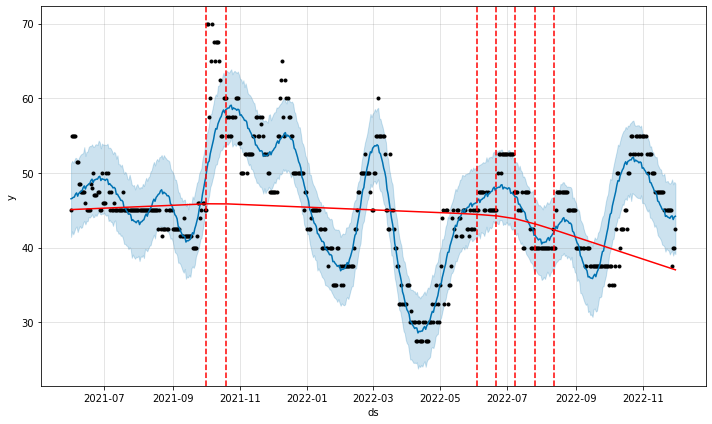

In [106]:
from fbprophet.plot import add_changepoints_to_plot
fig = t.plot(forecast_t)
a = add_changepoints_to_plot(fig.gca(), t, forecast_t)

In [107]:
df_S = pd.read_csv('Onion.csv')

In [108]:
df_S.columns = ['ds', 'y']

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


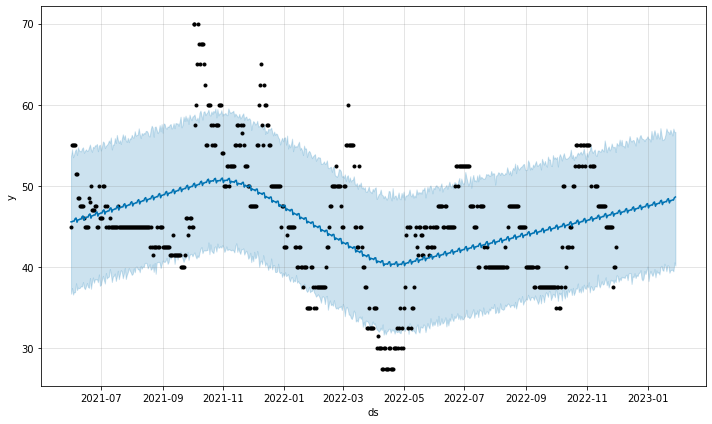

In [109]:
S = Prophet()
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

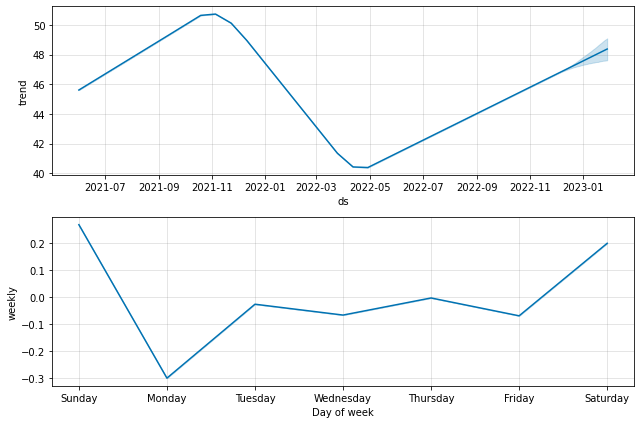

In [110]:
figure = S.plot_components(forecast);

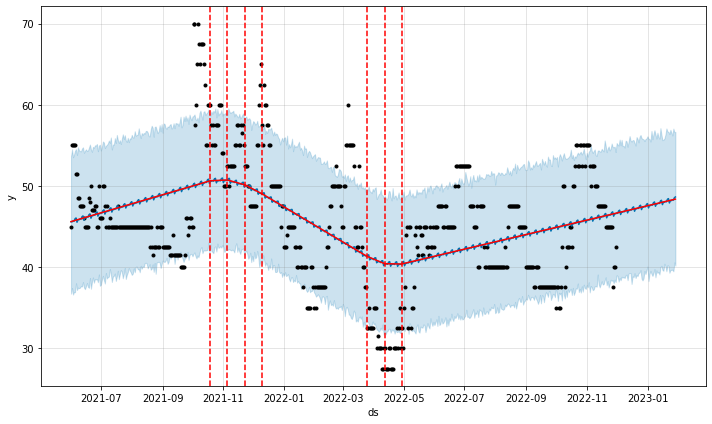

In [111]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


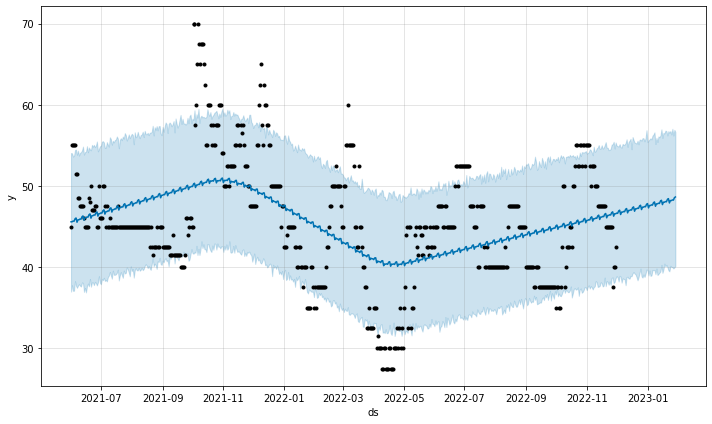

In [112]:
S = Prophet(seasonality_mode='additive')
S.fit(df_S)
future = S.make_future_dataframe(60)
forecast = S.predict(future)
figure = S.plot(forecast)

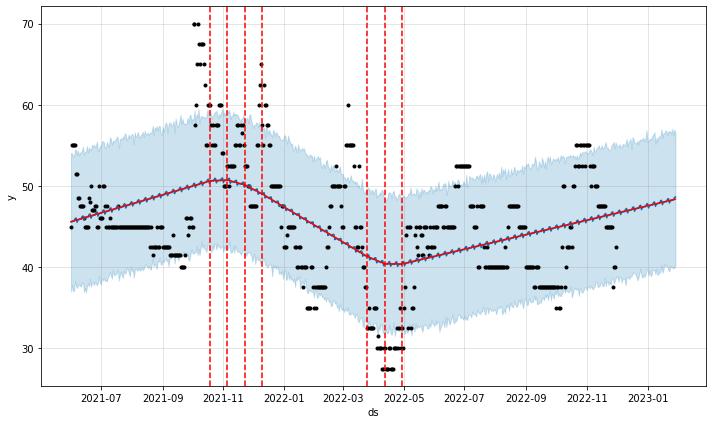

In [113]:
from fbprophet.plot import add_changepoints_to_plot 
figure = S.plot(forecast)
a = add_changepoints_to_plot(figure.gca(), S, forecast)

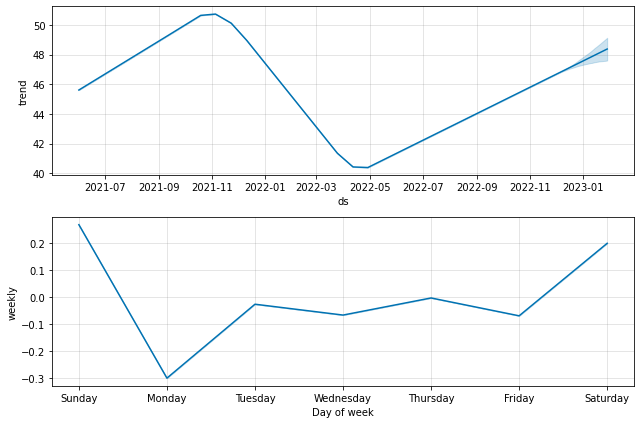

In [114]:
figure = S.plot_components(forecast)

# ***LSTM***

In [115]:
df_LSTM=pd.read_csv("Onion.csv",parse_dates=["Date"],index_col=[0])

In [116]:
print(df_LSTM.index.freq)

None


In [117]:
test_split=round(len(df_LSTM)*0.20)

In [118]:
df_for_training=df[:-110]
df_for_testing=df[-110:]

In [119]:
print(df_for_training.shape)
print(df_for_testing.shape)

(438, 1)
(110, 1)


In [120]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [121]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [122]:
df_for_training_scaled

array([[0.41176471],
       [0.64705882],
       [0.64705882],
       [0.64705882],
       [0.64705882],
       [0.56470588],
       [0.56470588],
       [0.49411765],
       [0.49411765],
       [0.47058824],
       [0.47058824],
       [0.47058824],
       [0.47058824],
       [0.43529412],
       [0.41176471],
       [0.41176471],
       [0.41176471],
       [0.41176471],
       [0.49411765],
       [0.48235294],
       [0.52941176],
       [0.45882353],
       [0.45882353],
       [0.45882353],
       [0.47058824],
       [0.47058824],
       [0.41176471],
       [0.41176471],
       [0.52941176],
       [0.43529412],
       [0.43529412],
       [0.43529412],
       [0.52941176],
       [0.52941176],
       [0.47058824],
       [0.41176471],
       [0.47058824],
       [0.41176471],
       [0.41176471],
       [0.43529412],
       [0.41176471],
       [0.41176471],
       [0.41176471],
       [0.41176471],
       [0.41176471],
       [0.41176471],
       [0.41176471],
       [0.470

In [123]:
df_for_training_scaled.shape

(438, 1)

In [124]:
df_for_testing_scaled.shape

(110, 1)

In [125]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [126]:
trainX,trainY=createXY(df_for_training_scaled,30)

In [127]:
trainX.shape

(408, 30, 1)

In [128]:
testX,testY=createXY(df_for_testing_scaled,30)

In [129]:
trainX[0]

array([[0.41176471],
       [0.64705882],
       [0.64705882],
       [0.64705882],
       [0.64705882],
       [0.56470588],
       [0.56470588],
       [0.49411765],
       [0.49411765],
       [0.47058824],
       [0.47058824],
       [0.47058824],
       [0.47058824],
       [0.43529412],
       [0.41176471],
       [0.41176471],
       [0.41176471],
       [0.41176471],
       [0.49411765],
       [0.48235294],
       [0.52941176],
       [0.45882353],
       [0.45882353],
       [0.45882353],
       [0.47058824],
       [0.47058824],
       [0.41176471],
       [0.41176471],
       [0.52941176],
       [0.43529412]])

In [130]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (408, 30, 1)
trainY Shape--  (408,)


In [131]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (80, 30, 1)
testY Shape--  (80,)


In [132]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.41176471]
 [0.64705882]
 [0.64705882]
 [0.64705882]
 [0.64705882]
 [0.56470588]
 [0.56470588]
 [0.49411765]
 [0.49411765]
 [0.47058824]
 [0.47058824]
 [0.47058824]
 [0.47058824]
 [0.43529412]
 [0.41176471]
 [0.41176471]
 [0.41176471]
 [0.41176471]
 [0.49411765]
 [0.48235294]
 [0.52941176]
 [0.45882353]
 [0.45882353]
 [0.45882353]
 [0.47058824]
 [0.47058824]
 [0.41176471]
 [0.41176471]
 [0.52941176]
 [0.43529412]]

trainY[0]--  0.4352941176470587


In [133]:
trainY[0]

0.4352941176470587

In [134]:
trainY.shape

(408,)

In [135]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model
#Grid Search
grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,24,32],
              'epochs' : [32,64],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

In [136]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/32
13/13 [==============================] - 5s 103ms/step - loss: 0.0611 - val_loss: 0.0130
Epoch 2/32
13/13 [==============================] - 0s 29ms/step - loss: 0.0171 - val_loss: 0.0172
Epoch 3/32
13/13 [==============================] - 0s 30ms/step - loss: 0.0138 - val_loss: 0.0099
Epoch 4/32
13/13 [==============================] - 0s 29ms/step - loss: 0.0139 - val_loss: 0.0108
Epoch 5/32
13/13 [==============================] - 0s 29ms/step - loss: 0.0126 - val_loss: 0.0090
Epoch 6/32
13/13 [==============================] - 0s 30ms/step - loss: 0.0106 - val_loss: 0.0070
Epoch 7/32
13/13 [==============================] - 0s 30ms/step - loss: 0.0100 - val_loss: 0.0064
Epoch 8/32
13/13 [==============================] - 0s 31ms/step - loss: 0.0091 - val_loss: 0.0090
Epoch 9/32
13/13 [==============================] - 0s 31ms/step - loss: 0.0091 - val_loss: 0.0051
Epoch 10/32
13/13 [==============================] - 0s 29ms/step - loss: 0.0080 - val_loss: 0.0059
Epoch 11

In [137]:
grid_search.best_params_

{'batch_size': 32, 'epochs': 64, 'optimizer': 'adam'}

In [138]:
my_model=grid_search.best_estimator_.model

In [139]:
my_model

In [140]:
prediction=my_model.predict(testX)

3/3 [==============================] - 1s 9ms/step


In [141]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.26575422]
 [0.27585506]
 [0.28535473]
 [0.27525526]
 [0.2622695 ]
 [0.2518769 ]
 [0.24527003]
 [0.24191752]
 [0.24081244]
 [0.2410138 ]
 [0.2418276 ]
 [0.24281931]
 [0.24375996]
 [0.24450034]
 [0.24509427]
 [0.24556533]
 [0.24594773]
 [0.24627286]
 [0.24656372]
 [0.24683431]
 [0.23099868]
 [0.23030916]
 [0.23451369]
 [0.22361268]
 [0.21103558]
 [0.21667655]
 [0.2595077 ]
 [0.3578583 ]
 [0.44899017]
 [0.4126795 ]
 [0.37039512]
 [0.35438257]
 [0.3499245 ]
 [0.35056   ]
 [0.37112725]
 [0.3915823 ]
 [0.38725984]
 [0.4341658 ]
 [0.48066902]
 [0.5325829 ]
 [0.5885608 ]
 [0.62345076]
 [0.61469436]
 [0.5964099 ]
 [0.60325515]
 [0.61252475]
 [0.5961546 ]
 [0.6029707 ]
 [0.61215043]
 [0.5957972 ]
 [0.60286665]
 [0.61217296]
 [0.6185465 ]
 [0.62143314]
 [0.59883845]
 [0.5569589 ]
 [0.5490526 ]
 [0.5520762 ]
 [0.55756664]
 [0.5397835 ]
 [0.52365655]
 [0.5136806 ]
 [0.48778093]
 [0.4680461 ]
 [0.45696852]
 [0.4524076 ]
 [0.4515841 ]
 [0.45253333]
 [0.45383826]
 [0.45493945]
 [0.4355

In [142]:
scaler.inverse_transform(prediction)

array([[38.794556],
       [39.223843],
       [39.62758 ],
       [39.19835 ],
       [38.646454],
       [38.20477 ],
       [37.923977],
       [37.781494],
       [37.734528],
       [37.743088],
       [37.777676],
       [37.81982 ],
       [37.8598  ],
       [37.891266],
       [37.916508],
       [37.936527],
       [37.952778],
       [37.9666  ],
       [37.97896 ],
       [37.99046 ],
       [37.317444],
       [37.28814 ],
       [37.46683 ],
       [37.00354 ],
       [36.469013],
       [36.70875 ],
       [38.529076],
       [42.708977],
       [46.58208 ],
       [45.038876],
       [43.24179 ],
       [42.561256],
       [42.37179 ],
       [42.3988  ],
       [43.272907],
       [44.142246],
       [43.958546],
       [45.95205 ],
       [47.928432],
       [50.134773],
       [52.513836],
       [53.99666 ],
       [53.62451 ],
       [52.847424],
       [53.138344],
       [53.532303],
       [52.83657 ],
       [53.126255],
       [53.516396],
       [52.82138 ],


In [143]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [144]:
prediction_copies_array.shape

(80, 1)

In [145]:
prediction_copies_array

array([[0.26575422],
       [0.27585506],
       [0.28535473],
       [0.27525526],
       [0.2622695 ],
       [0.2518769 ],
       [0.24527003],
       [0.24191752],
       [0.24081244],
       [0.2410138 ],
       [0.2418276 ],
       [0.24281931],
       [0.24375996],
       [0.24450034],
       [0.24509427],
       [0.24556533],
       [0.24594773],
       [0.24627286],
       [0.24656372],
       [0.24683431],
       [0.23099868],
       [0.23030916],
       [0.23451369],
       [0.22361268],
       [0.21103558],
       [0.21667655],
       [0.2595077 ],
       [0.3578583 ],
       [0.44899017],
       [0.4126795 ],
       [0.37039512],
       [0.35438257],
       [0.3499245 ],
       [0.35056   ],
       [0.37112725],
       [0.3915823 ],
       [0.38725984],
       [0.4341658 ],
       [0.48066902],
       [0.5325829 ],
       [0.5885608 ],
       [0.62345076],
       [0.61469436],
       [0.5964099 ],
       [0.60325515],
       [0.61252475],
       [0.5961546 ],
       [0.602

In [146]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),1)))[:,0]

In [147]:
pred

array([38.794556, 39.223843, 39.62758 , 39.19835 , 38.646454, 38.20477 ,
       37.923977, 37.781494, 37.734528, 37.743088, 37.777676, 37.81982 ,
       37.8598  , 37.891266, 37.916508, 37.936527, 37.952778, 37.9666  ,
       37.97896 , 37.99046 , 37.317444, 37.28814 , 37.46683 , 37.00354 ,
       36.469013, 36.70875 , 38.529076, 42.708977, 46.58208 , 45.038876,
       43.24179 , 42.561256, 42.37179 , 42.3988  , 43.272907, 44.142246,
       43.958546, 45.95205 , 47.928432, 50.134773, 52.513836, 53.99666 ,
       53.62451 , 52.847424, 53.138344, 53.532303, 52.83657 , 53.126255,
       53.516396, 52.82138 , 53.121834, 53.517353, 53.788227, 53.910908,
       52.950634, 51.170753, 50.834736, 50.96324 , 51.196583, 50.4408  ,
       49.7554  , 49.331425, 48.23069 , 47.39196 , 46.921165, 46.727325,
       46.692326, 46.73267 , 46.788124, 46.83493 , 46.00923 , 45.253353,
       44.76139 , 44.515003, 44.437016, 44.44951 , 44.496784, 42.171307,
       40.77125 , 40.01495 ], dtype=float32)

In [148]:
original_copies_array = np.repeat(testY,1, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),1)))[:,0]

In [149]:
pred

array([38.794556, 39.223843, 39.62758 , 39.19835 , 38.646454, 38.20477 ,
       37.923977, 37.781494, 37.734528, 37.743088, 37.777676, 37.81982 ,
       37.8598  , 37.891266, 37.916508, 37.936527, 37.952778, 37.9666  ,
       37.97896 , 37.99046 , 37.317444, 37.28814 , 37.46683 , 37.00354 ,
       36.469013, 36.70875 , 38.529076, 42.708977, 46.58208 , 45.038876,
       43.24179 , 42.561256, 42.37179 , 42.3988  , 43.272907, 44.142246,
       43.958546, 45.95205 , 47.928432, 50.134773, 52.513836, 53.99666 ,
       53.62451 , 52.847424, 53.138344, 53.532303, 52.83657 , 53.126255,
       53.516396, 52.82138 , 53.121834, 53.517353, 53.788227, 53.910908,
       52.950634, 51.170753, 50.834736, 50.96324 , 51.196583, 50.4408  ,
       49.7554  , 49.331425, 48.23069 , 47.39196 , 46.921165, 46.727325,
       46.692326, 46.73267 , 46.788124, 46.83493 , 46.00923 , 45.253353,
       44.76139 , 44.515003, 44.437016, 44.44951 , 44.496784, 42.171307,
       40.77125 , 40.01495 ], dtype=float32)

In [150]:
print("Predicted Values-- " ,pred)
print("\nOriginal Values-- ",original)

Predicted Values--  [38.794556 39.223843 39.62758  39.19835  38.646454 38.20477  37.923977
 37.781494 37.734528 37.743088 37.777676 37.81982  37.8598   37.891266
 37.916508 37.936527 37.952778 37.9666   37.97896  37.99046  37.317444
 37.28814  37.46683  37.00354  36.469013 36.70875  38.529076 42.708977
 46.58208  45.038876 43.24179  42.561256 42.37179  42.3988   43.272907
 44.142246 43.958546 45.95205  47.928432 50.134773 52.513836 53.99666
 53.62451  52.847424 53.138344 53.532303 52.83657  53.126255 53.516396
 52.82138  53.121834 53.517353 53.788227 53.910908 52.950634 51.170753
 50.834736 50.96324  51.196583 50.4408   49.7554   49.331425 48.23069
 47.39196  46.921165 46.727325 46.692326 46.73267  46.788124 46.83493
 46.00923  45.253353 44.76139  44.515003 44.437016 44.44951  44.496784
 42.171307 40.77125  40.01495 ]

Original Values--  [40.  40.  37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5 37.5
 37.5 37.5 37.5 37.5 37.5 35.  37.5 37.5 35.  35.  37.5 42.5 50.  50.
 37.5 40.

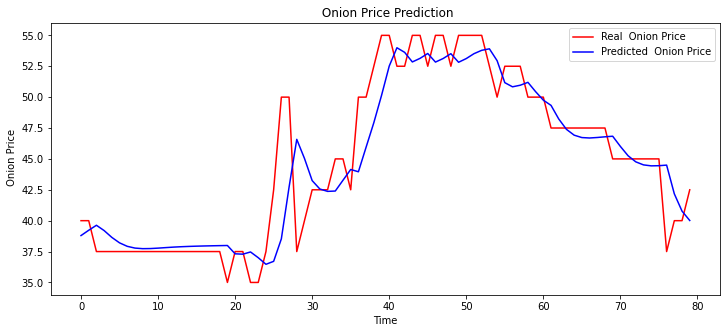

In [151]:
plt.plot(original, color = 'red', label = 'Real  Onion Price')
plt.plot(pred, color = 'blue', label = 'Predicted  Onion Price')
plt.title(' Onion Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Onion Price')
plt.legend()
plt.show()

In [152]:
mean_absolute_error(original, pred)

1.785388994216919

In [153]:
mean_squared_error(original, pred)

7.520235782794953

In [154]:
rmse(pred, original)

2.742304830392667